# Day 12

In [1]:
from aocd import get_data
from IPython.display import display, Markdown

def answer(x):
    display(Markdown(f"**Answer** = {x}"))

data = get_data(year=2023, day=12)

## Part 1

In [2]:
from inspect import cleandoc

example = cleandoc("""
    ???.### 1,1,3
    .??..??...?##. 1,1,3
    ?#?#?#?#?#?#?#? 1,3,1,6
    ????.#...#... 4,1,1
    ????.######..#####. 1,6,5
    ?###???????? 3,2,1
""")

In [3]:
from dataclasses import dataclass
from enum import Enum
from functools import cache
from math import comb
from matplotlib import pyplot
from matplotlib.pyplot import imshow


@dataclass(frozen=True)
class SpringConditionRecord:
    springs: str
    groups: tuple[int]

    def arrangements_from(self, spring_i, group_i):
        last_group = group_i == len(self.groups) - 1

        if group_i >= len(self.groups):
            if "#" in self.springs[spring_i:]:
                return []
            else:
                return ["." * (len(self.springs) - spring_i)]
        elif len(self.springs) - spring_i - self.groups[group_i] - (0 if last_group else 1) < 0:
            return []
        elif (
            "." in self.springs[spring_i:spring_i + self.groups[group_i]]
            or (not last_group and self.springs[spring_i + self.groups[group_i]] == "#")
        ):
            if self.springs[spring_i] == "#":
                return []
            else:
                return [
                    "." + arr
                    for arr in self.arrangements_from(spring_i + 1, group_i)
                ]
        else:
            if self.springs[spring_i] == "#":
                return [
                    ("#" * self.groups[group_i]) + (arr if last_group else "." + arr)
                    for arr in self.arrangements_from(spring_i + self.groups[group_i] + (0 if last_group else 1), group_i + 1)
                ]
            else:
                return [
                    ("#" * self.groups[group_i]) + (arr if last_group else "." + arr)
                    for arr in self.arrangements_from(spring_i + self.groups[group_i] + (0 if last_group else 1), group_i + 1)
                ] + [
                    "." + arr
                    for arr in self.arrangements_from(spring_i + 1, group_i)
                ]

    def arrangements(self):
        return self.arrangements_from(0, 0)

    @cache
    def arrangement_count_from(self, spring_i, group_i):
        last_group = group_i == len(self.groups) - 1

        if group_i >= len(self.groups):
            if "#" in self.springs[spring_i:]:
                return 0
            else:
                return 1
        elif len(self.springs) - spring_i - self.groups[group_i] - (0 if last_group else 1) < 0:
            return 0
        elif (
            "." in self.springs[spring_i:spring_i + self.groups[group_i]]
            or (not last_group and self.springs[spring_i + self.groups[group_i]] == "#")
        ):
            if self.springs[spring_i] == "#":
                return 0
            else:
                return self.arrangement_count_from(spring_i + 1, group_i)
        else:
            if self.springs[spring_i] == "#":
                return self.arrangement_count_from(spring_i + self.groups[group_i] + (0 if last_group else 1), group_i + 1)
            else:
                return (
                    self.arrangement_count_from(spring_i + self.groups[group_i] + (0 if last_group else 1), group_i + 1)
                    + self.arrangement_count_from(spring_i + 1, group_i)
                )
    
    def arrangement_count(self):
        return self.arrangement_count_from(0, 0)

    def arrangement_count_bound(self):
        return comb(len(self.springs) - sum(self.groups) + 1, len(self.groups))

def record_image(line):
    PIXELS = {".": (255, 255, 255), "#": (0, 0, 0), "?": (125, 125, 125)}
    return [[PIXELS[c] for c in line]]

def parse_record(text):
    springs, groups = text.split(" ")
    return SpringConditionRecord(springs, tuple(map(int, groups.split(","))))

def parse(text):
    return [parse_record(line) for line in text.split("\n")]

def arrangement_count_sum(records):
    return sum(record.arrangement_count() for record in records)

example_records = parse(example)

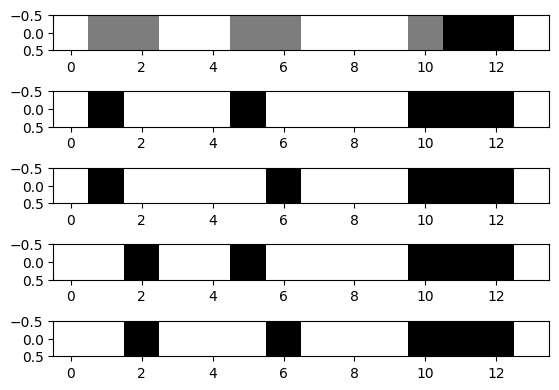

In [4]:
def show_arrangements(record):
    arrangements = record.arrangements()
    n = len(arrangements) + 1
    fig = pyplot.figure()
    fig.add_subplot(n, 1, 1)
    imshow(record_image(record.springs))
    for i, arrangement in enumerate(arrangements, start=2):
        fig.add_subplot(n, 1, i)
        imshow(record_image(arrangement))

show_arrangements(example_records[1])

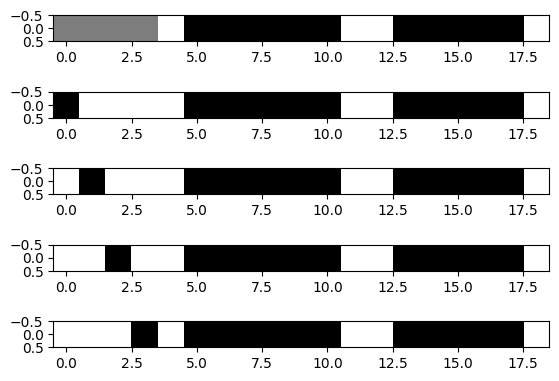

In [5]:
show_arrangements(example_records[4])

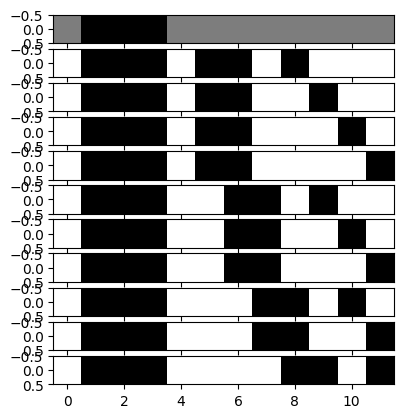

In [6]:
show_arrangements(example_records[5])

In [7]:
arrangement_count_sum(example_records)

21

In [8]:
answer(arrangement_count_sum(parse(data)))

**Answer** = 7599

## Part 2

In [9]:
def unfold_record(text):
    springs, groups = text.split(" ")
    return f"{"?".join([springs] * 5)} {",".join([groups] * 5)}"

def parse2(text):
    return [parse_record(unfold_record(line)) for line in text.split("\n")]

arrangement_count_sum(parse2(example))

525152

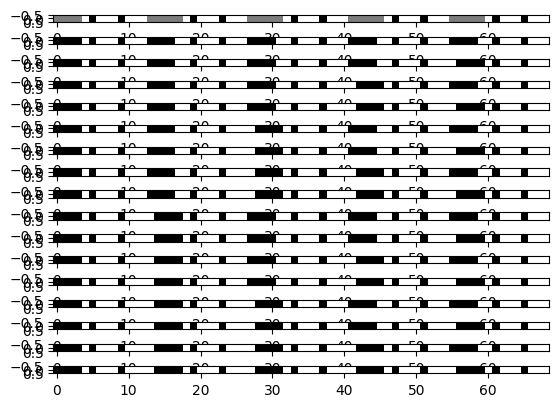

In [10]:
show_arrangements(parse2(example)[3])

In [11]:
answer(arrangement_count_sum(parse2(data)))

**Answer** = 15454556629917